<a href="https://colab.research.google.com/github/elsa9421/Interactive-IPython-Demos/blob/main/Multidimensional_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Notebook demonstrates the following Metric based Multidimensional scaling given a dissimilarity matrix

1.   Classical MDS
2.   Metric (Stress Criterion) MDS



## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import MDS
sns.set()


### Data

We use the `Ekman data set` (Ekman,1954, Izenman 13.2.1) which was used to study the perception of color in human vision.

>To obtain Ekman Dissimilarity Matrix
* Ekman presents similarities for 14 colors differing only in their hue (i.e., wavelengths from 434 µm to 674 µm)
* which were rated by 31 subjects where each pair of colors was rated on a 5-point scale (0 = no similarity up to 4 = identical).
* Average of 31 ratings for each pair (representing similarity) is
then scaled(divided by 4 such that they are within the unit interval)  and subtracted from 1 to represent dissimilarities

The resulting 14 × 14 dissimilarity matrix is symmetric, and
contains zeros in the diagonal. MDS seeks a 2D configuration to
represent these colors

The Similarity matrix was obtained from - [link](https://rdrr.io/rforge/smacof/man/ekman.html)

Note : A matrix is a similarity matrix if larger numbers indicate more similarity between items, rather than less. A matrix is a dissimilarity matrix if larger numbers indicate less similarity. 

References
Ekman, G. (1954). Dimensions of color vision. Journal of Psychology, 38, 467-474.





In [ ]:
# List of tuples
Wavelength_similarity = np.array( [
                            [1.00,0.86,0.42,0.42,0.18,0.06,0.07,0.04,0.02,0.07,0.09,0.12,0.13,0.16],
                            [0.86,1.00,0.50,0.44,0.22,0.09,0.07,0.07,0.02,0.04,0.07,0.11,0.13,0.14],
                            [0.42,0.50,1.00,0.81,0.47,0.17,0.10,0.08,0.02,0.01,0.02,0.01,0.05,0.03],
                            [0.42,0.44,0.81,1.00,0.54,0.25,0.10,0.09,0.02,0.01,0.00,0.01,0.02,0.04],
                            [0.18,0.22,0.47,0.54,1.00,0.61,0.31,0.26,0.07,0.02,0.02,0.01,0.02,0.00],
                            [0.06,0.09,0.17,0.25,0.61,1.00,0.62,0.45,0.14,0.08,0.02,0.02,0.02,0.01],
                            [0.07,0.07,0.10,0.10,0.31,0.62,1.00,0.73,0.22,0.14,0.05,0.02,0.02,0.00],
                            [0.04,0.07,0.08,0.09,0.26,0.45,0.73,1.00,0.33,0.19,0.04,0.03,0.02,0.02],
                            [0.02,0.02,0.02,0.02,0.07,0.14,0.22,0.33,1.00,0.58,0.37,0.27,0.20,0.23],
                            [0.07,0.04,0.01,0.01,0.02,0.08,0.14,0.19,0.58,1.00,0.74,0.50,0.41,0.28],
                            [0.09,0.07,0.02,0.00,0.02,0.02,0.05,0.04,0.37,0.74,1.00,0.76,0.62,0.55],
                            [0.12,0.11,0.01,0.01,0.01,0.02,0.02,0.03,0.27,0.50,0.76,1.00,0.85,0.68],
                            [0.13,0.13,0.05,0.02,0.02,0.02,0.02,0.02,0.20,0.41,0.62,0.85,1.00,0.76],
                            [0.16,0.14,0.03,0.04,0.00,0.01,0.00,0.02,0.23,0.28,0.55,0.68,0.76,1.00]
                            ])

Wavelength_dissimilarity=1-Wavelength_similarity



# Create DataFrame object from a list of tuples

print(" \t\t\tThe Dissimilarity Matrix (14 x 14): ")
wavelengths=["w434","w445","w465","w472","w490","w504","w537","w555","w584","w600","w610","w628","w651","w674"]
wavelength_num=[434,445,465,472,490,504,537,555,584,600,610,628,651,674]
dfObj = pd.DataFrame(Wavelength_dissimilarity, columns = wavelengths, index=wavelengths)

dfObj


 			The Dissimilarity Matrix (14 x 14): 


,w434,w445,w465,w472,w490,w504,w537,w555,w584,w600,w610,w628,w651,w674
w434,0.00,0.14,0.58,0.58,0.82,0.94,0.93,0.96,0.98,0.93,0.91,0.88,0.87,0.84
w445,0.14,0.00,0.50,0.56,0.78,0.91,0.93,0.93,0.98,0.96,0.93,0.89,0.87,0.86
w465,0.58,0.50,0.00,0.19,0.53,0.83,0.90,0.92,0.98,0.99,0.98,0.99,0.95,0.97
w472,0.58,0.56,0.19,0.00,0.46,0.75,0.90,0.91,0.98,0.99,1.00,0.99,0.98,0.96
w490,0.82,0.78,0.53,0.46,0.00,0.39,0.69,0.74,0.93,0.98,0.98,0.99,0.98,1.00
w504,0.94,0.91,0.83,0.75,0.39,0.00,0.38,0.55,0.86,0.92,0.98,0.98,0.98,0.99
w537,0.93,0.93,0.90,0.90,0.69,0.38,0.00,0.27,0.78,0.86,0.95,0.98,0.98,1.00
w555,0.96,0.93,0.92,0.91,0.74,0.55,0.27,0.00,0.67,0.81,0.96,0.97,0.98,0.98
w584,0.98,0.98,0.98,0.98,0.93,0.86,0.78,0.67,0.00,0.42,0.63,0.73,0.80,0.77
w600,0.93,0.96,0.99,0.99,0.98,0.92,0.86,0.81,0.42,0.00,0.26,0.50,0.59,0.72


## Classical MDS and Metric (Stress Criterion) MDS

MDS reproduces the well-known two-dimensional color circle.

Text(0.5, 0, 'Wavelength (nm)')

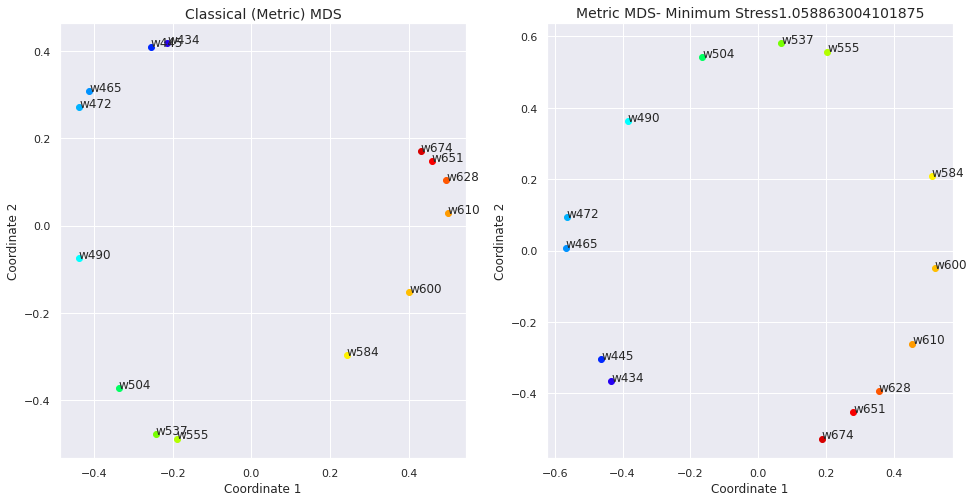

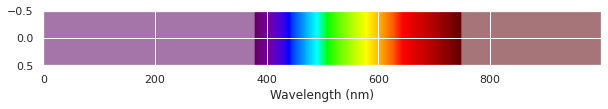

In [ ]:
## Function for Classical MDS

 
def classical_mdscale(D,p):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.    
    p:  Number of dimensions to be returned                                                      
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
    if p<=len(w):
      Y=Y[:,:p]
 
    return Y, evals


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)



Y, evals=classical_mdscale(Wavelength_dissimilarity, p=2)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
#plt.scatter(Y[:,0],Y[:,1],c=)

plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.title("Classical (Metric) MDS", fontsize=14)
for idx,color in enumerate(wavelengths):
  R,G,B,_=wavelength_to_rgb(wavelength_num[idx])
  plt.scatter(Y[idx,0],Y[idx,1],color=(R,G,B))
  plt.annotate(color, (Y[idx,0],Y[idx,1]),arrowprops=dict(arrowstyle="->"))


#--------------------------------------------------------------------Metric MDS- Stress Criterion-----------
from sklearn.manifold import MDS

#-----
embedding=MDS(n_components=2,dissimilarity='precomputed', metric='True') # random_state=6
Wavelength_transformed=embedding.fit(Wavelength_dissimilarity)
Wavelength_transformed_embedding=Wavelength_transformed.embedding_
Wavelength_transformed_stress=Wavelength_transformed.stress_

plt.subplot(1,2,2)
sns.set()
plt.title("Metric MDS- Minimum Stress{}".format(Wavelength_transformed_stress),fontsize=14)
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
#plt.scatter(Wavelength_transformed_embedding[:,0],Wavelength_transformed_embedding[:,1])
for idx,color in enumerate(wavelengths):
  R,G,B,_=wavelength_to_rgb(wavelength_num[idx])
  plt.scatter(Wavelength_transformed_embedding[idx,0],Wavelength_transformed_embedding[idx,1],color=(R,G,B))
  #plt.scatter(Y[idx,0],Y[idx,1],color=(R,G,B))
  plt.annotate(color, (Wavelength_transformed_embedding[idx,0],Wavelength_transformed_embedding[idx,1]))


#____________________________________________________________________________


clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1, figsize=(10,1))

wavelengths_ = np.linspace(1, 1000,1000)


y_ = np.linspace(0, 10, 1)
X,Y_ = np.meshgrid(wavelengths_, y_)

# extent=(np.min(wavelengths), np.max(wavelengths),0, 0.2)

plt.imshow(X, clim=clim,cmap=spectralmap,aspect='auto')

plt.xlabel('Wavelength (nm)')

#____________________________________________________________________________

## Model Checking 



Text(0.5, 1.0, 'Classical MDS:Pairwise Distance: Projected to 2 Components')

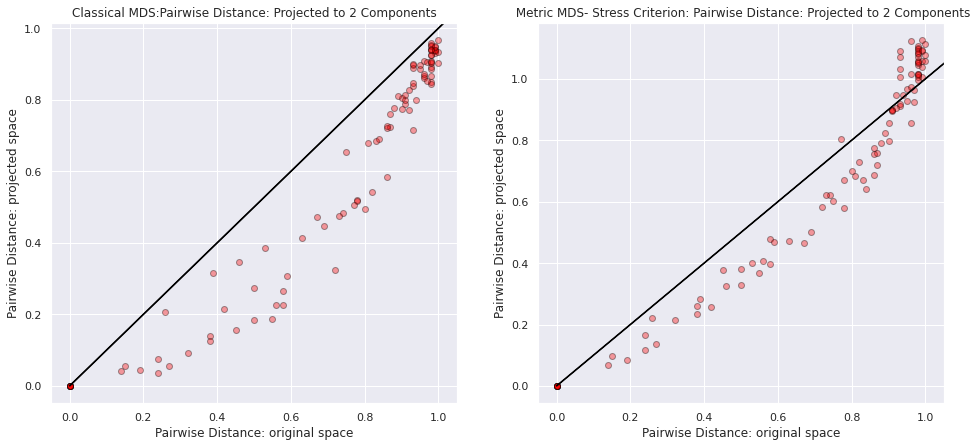

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dists =Wavelength_dissimilarity.ravel()
sns.set()
# nonzero = dists != 0   # select only non-identical samples pairs
# dists = dists[nonzero]
projected_dists = euclidean_distances(Wavelength_transformed_embedding, squared=False).ravel()
plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.002,color='black',head_length=0.0,head_width=0.0)

plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title(" Metric MDS- Stress Criterion: Pairwise Distance: Projected to %d Components" % 2)


plt.subplot(1,2,1)


dists =Wavelength_dissimilarity.ravel()
# nonzero = dists != 0   # select only non-identical samples pairs
# dists = dists[nonzero]
projected_dists = euclidean_distances(Y, squared=False).ravel()

plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.002,color='black',head_length=0.0,head_width=0.0)

plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Classical MDS:Pairwise Distance: Projected to %d Components" % 2)